In [1]:
!pwd
!mkdir ~p ~/.kaggle

/content


In [0]:
!cp /content/kaggle.json ~/.kaggle

In [3]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:35<00:00, 66.8MB/s]
100% 2.29G/2.29G [00:36<00:00, 68.0MB/s]


# **Extracting the images from the zipfile** 

In [0]:
import os
import zipfile


In [0]:
zip_name = '/content/chest-xray-pneumonia.zip'

zipref = zipfile.ZipFile(zip_name,mode='r')

zipref.extractall('ChestData')

In [0]:
zipref.close()

## **importing the dependencies**





In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **information about the data**

In [0]:
# directory with normal training images

train_images_normal = '/content/ChestData/chest_xray/train/NORMAL'

# directory with pnemonia training images

train_images_pnemonia  = '/content/ChestData/chest_xray/train/PNEUMONIA'

In [9]:
# print total number of normal images in the training set
print('Total number of  normal training images',len(os.listdir(train_images_normal)))
# print total number of pnemonia images in the training set 
print('Total number of pnemonia training images',len(os.listdir(train_images_pnemonia)))

Total number of  normal training images 1341
Total number of pnemonia training images 3875


In [0]:
train_normal_image_names = os.listdir(train_images_normal)

train_pnemonia_image_names = os.listdir(train_images_pnemonia)

In [11]:
# see how the training images names look like
print('Train normal image names','\n\n',train_normal_image_names[0:10])
print('\n\n')
print('traning pnemonia images names','\n\n',train_pnemonia_image_names[0:10])

Train normal image names 

 ['NORMAL2-IM-0807-0001.jpeg', 'IM-0356-0001.jpeg', 'NORMAL2-IM-1162-0001.jpeg', 'IM-0367-0001.jpeg', 'IM-0400-0001.jpeg', 'IM-0650-0001-0001.jpeg', 'NORMAL2-IM-1138-0001.jpeg', 'IM-0501-0001.jpeg', 'IM-0531-0001-0001.jpeg', 'IM-0644-0001-0002.jpeg']



traning pnemonia images names 

 ['person292_virus_599.jpeg', 'person1733_bacteria_4566.jpeg', 'person1524_virus_2658.jpeg', 'person629_bacteria_2508.jpeg', 'person396_virus_789.jpeg', 'person1345_bacteria_3422.jpeg', 'person1307_virus_2251.jpeg', 'person1598_bacteria_4197.jpeg', 'person1086_virus_1798.jpeg', 'person819_virus_1455.jpeg']


# **Visualizing the data**

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
% matplotlib inline


In [0]:
# parameters for outputting images  ---> 10 * 10 configuration 
n_rows = 10
n_cols = 10



# Index for iterating over images
pic_index = 0




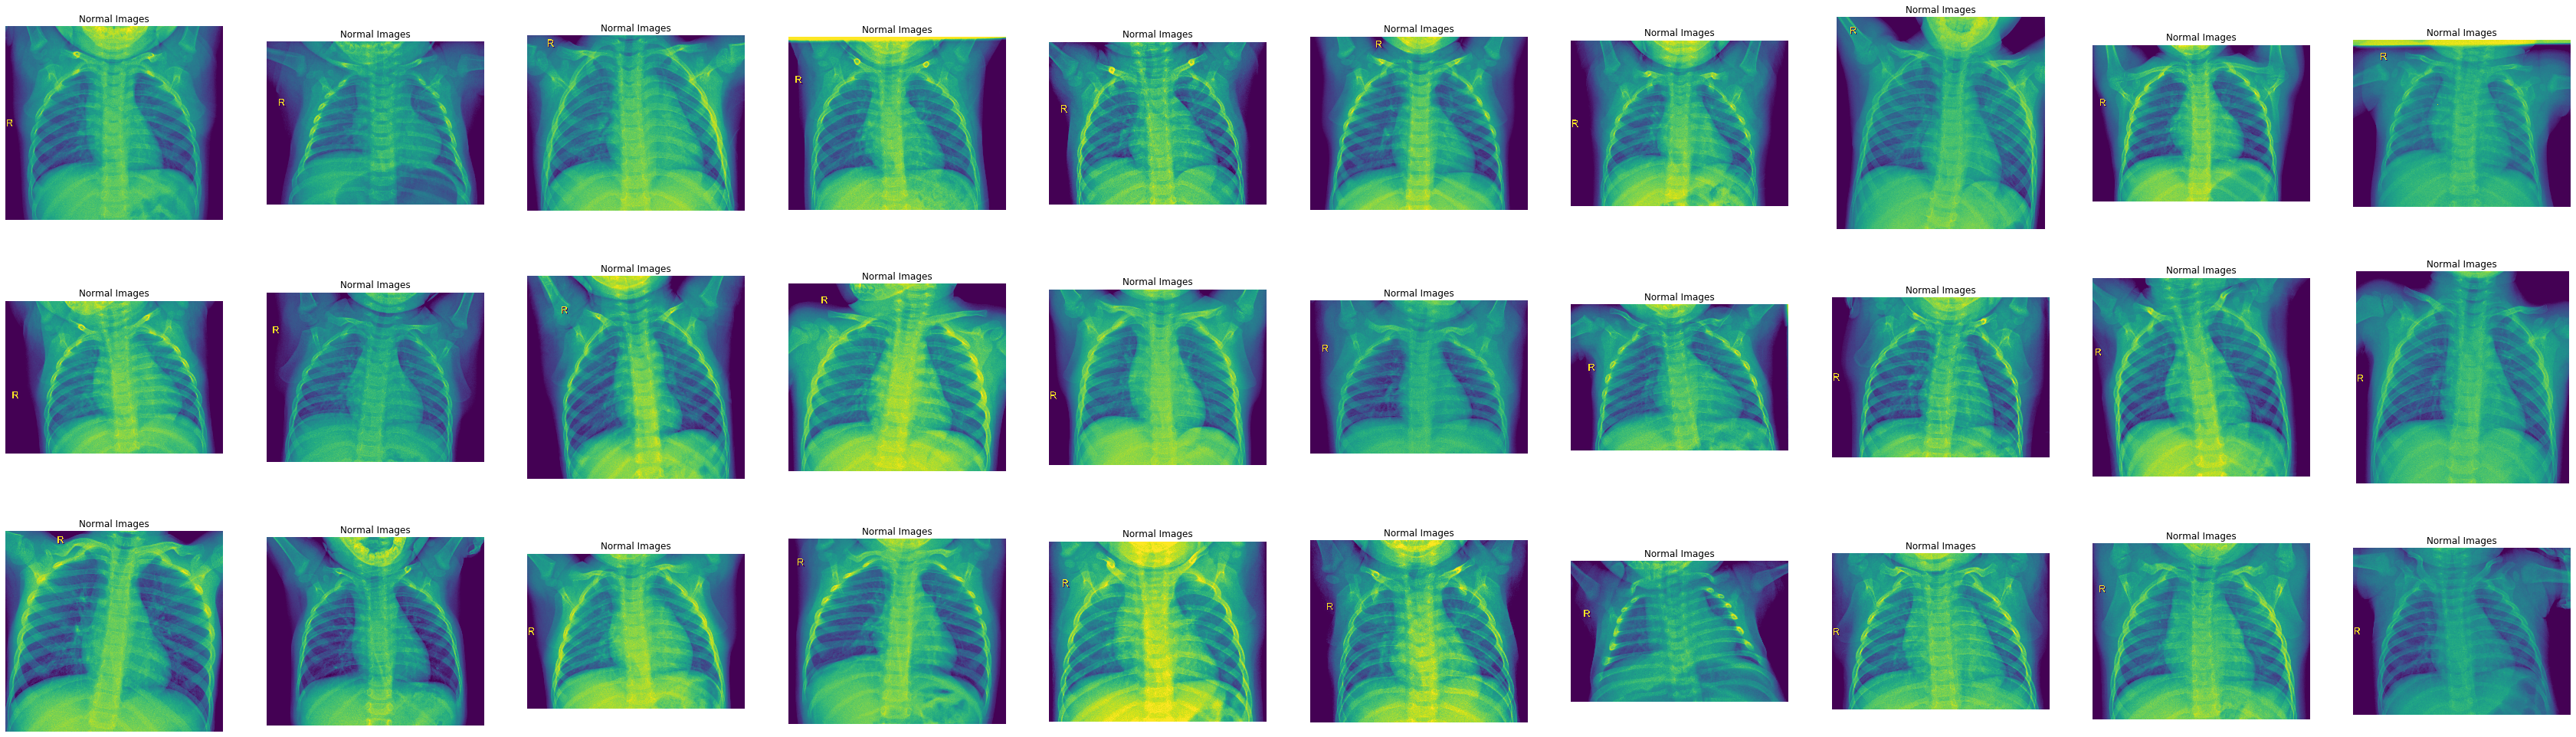

In [14]:
fig = plt.figure(1)

fig.set_size_inches(n_rows*6,n_cols*6)
pic_index += 30

next_normal_images = [os.path.join(train_images_normal,fname) 
                      for fname in train_normal_image_names[pic_index-30:pic_index]]

next_pnemonia_images = [os.path.join(train_images_pnemonia,fname)
                        for fname in train_pnemonia_image_names[pic_index-30:pic_index]]


for i,img_path in enumerate(next_normal_images):
  sub_plot = plt.subplot(n_rows,n_cols,i+1)
  sub_plot.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('Normal Images')

plt.show()

In [15]:
next_normal_images[0:10]

['/content/ChestData/chest_xray/train/NORMAL/NORMAL2-IM-0807-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/IM-0356-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/NORMAL2-IM-1162-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/IM-0367-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/IM-0400-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/IM-0650-0001-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/NORMAL2-IM-1138-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/IM-0501-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/IM-0531-0001-0001.jpeg',
 '/content/ChestData/chest_xray/train/NORMAL/IM-0644-0001-0002.jpeg']

In [16]:
len(next_normal_images)

30

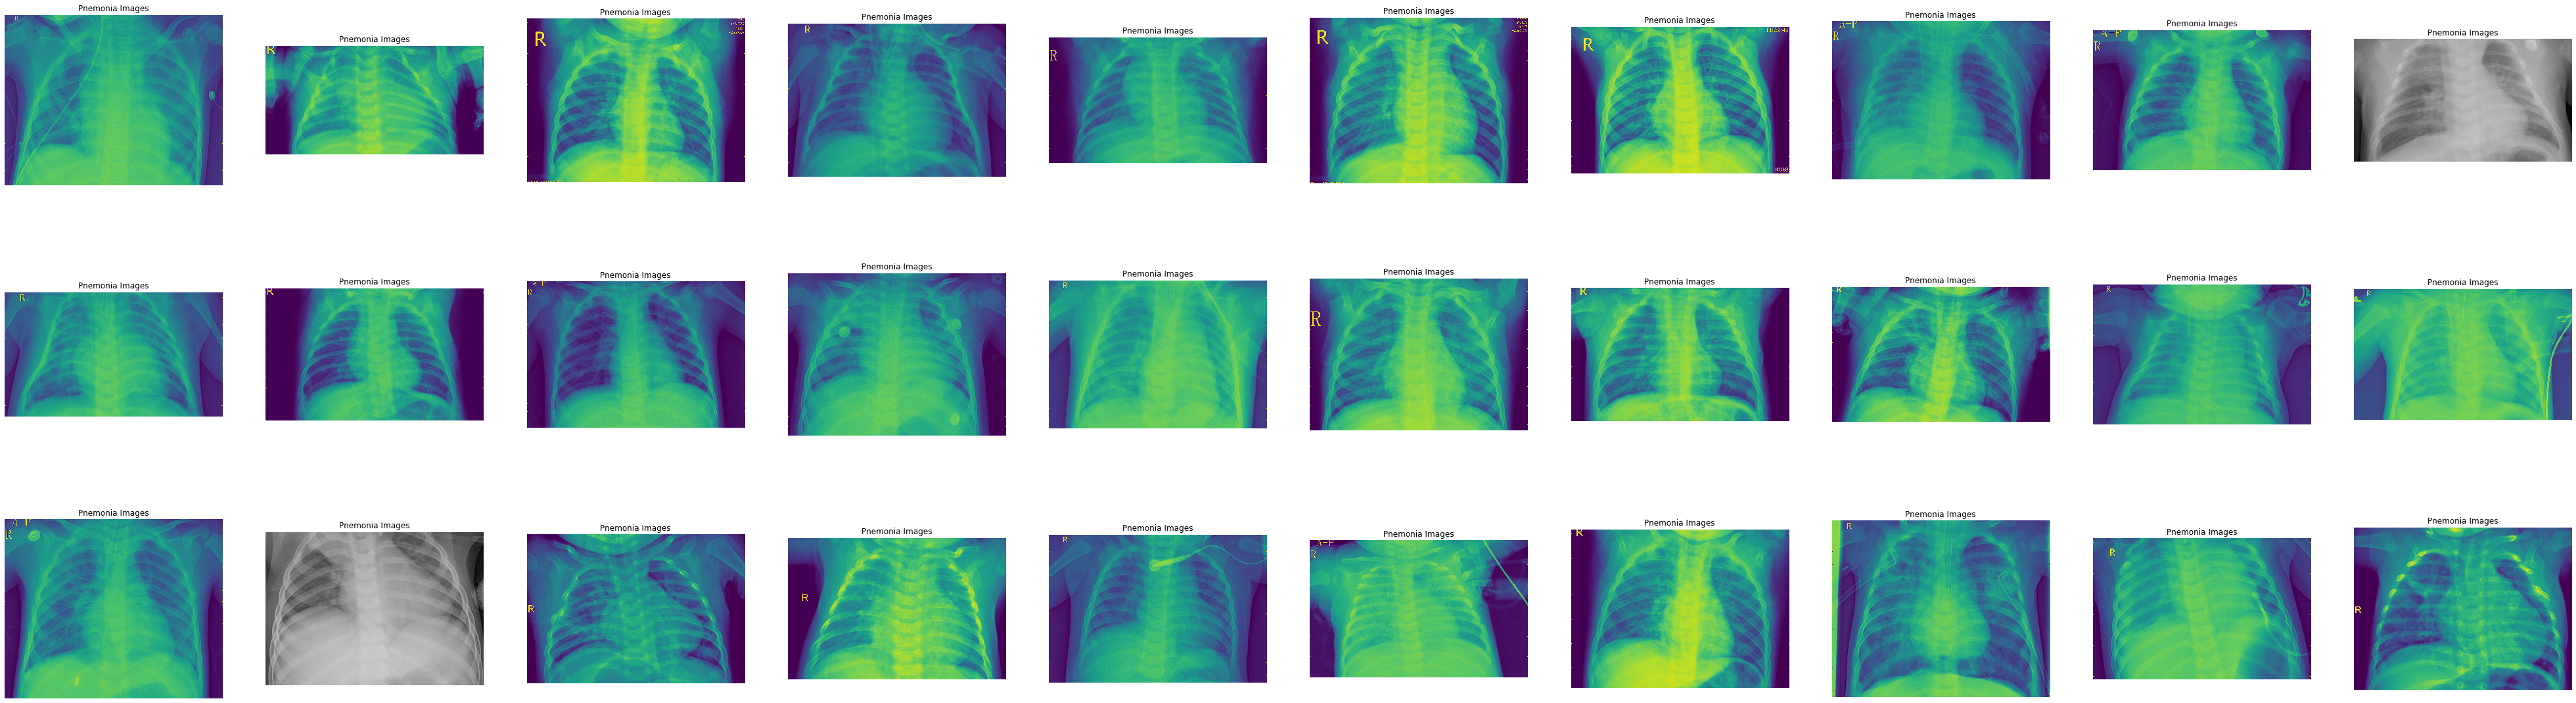

In [17]:
fig = plt.figure(2)
fig.set_size_inches(n_rows*7,n_cols * 7)




for i,img_path in enumerate(next_pnemonia_images):
  sub_plot = plt.subplot(n_rows,n_cols,i+1)
  sub_plot.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title('Pnemonia Images')

plt.show()

In [18]:
next_pnemonia_images[0:10]

['/content/ChestData/chest_xray/train/PNEUMONIA/person292_virus_599.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person1524_virus_2658.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person629_bacteria_2508.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person396_virus_789.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person1345_bacteria_3422.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person1307_virus_2251.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person1598_bacteria_4197.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person1086_virus_1798.jpeg',
 '/content/ChestData/chest_xray/train/PNEUMONIA/person819_virus_1455.jpeg']

In [19]:
img = mpimg.imread(next_pnemonia_images[0])
img.shape

(1192, 1520)

**All images are greyscale images**

#**Building the model with CNN using Tensorflow**

In [0]:

import tensorflow as tf

In [21]:
model = tf.keras.models.Sequential([
        

        # here we resize the imput image to 500* 800 while loading 
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(500,800,1)),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),

      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),

      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),

      tf.keras.layers.Dense(100,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')



])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 798, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 399, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 397, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 245, 395, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 197, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 195, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 97, 64)        0

In [23]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics =['acc','RootMeanSquaredError'] )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#**Loading data with the help of Image generators**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:

# normalizing images while loading , for all values in the images to be in the range (0,1)

train_gen = ImageDataGenerator(rescale=1/255)



In [26]:
training_generator = train_gen.flow_from_directory('/content/ChestData/chest_xray/train',
                            target_size=(500,800),batch_size=128,color_mode='grayscale',
                            class_mode='binary')

Found 5216 images belonging to 2 classes.


# Information about validation data

In [27]:
print('Number of normal validation images',len(os.listdir('/content/ChestData/chest_xray/val/NORMAL')))
print('NUmber of pnemonia validation images',len(os.listdir('/content/ChestData/chest_xray/val/PNEUMONIA')))

Number of normal validation images 8
NUmber of pnemonia validation images 8


## defining a validtion generator

In [28]:
val_gen = ImageDataGenerator(rescale = 1/255)

validation_generator = val_gen.flow_from_directory('/content/ChestData/chest_xray/val',target_size=(500,800),
                                                   color_mode = 'grayscale',class_mode='binary')

Found 16 images belonging to 2 classes.


# Training the model using image generator

In [29]:
model.fit_generator(training_generator,epochs=5,verbose=2,validation_data=validation_generator)

Epoch 1/15
Epoch 1/15
41/41 - 618s - loss: 0.4689 - acc: 0.8110 - root_mean_squared_error: 0.3770 - val_loss: 1.2909 - val_acc: 0.6250 - val_root_mean_squared_error: 0.5774
Epoch 2/15
Epoch 1/15
41/41 - 608s - loss: 0.1762 - acc: 0.9325 - root_mean_squared_error: 0.2267 - val_loss: 0.3575 - val_acc: 0.7500 - val_root_mean_squared_error: 0.3622
Epoch 3/15
Epoch 1/15
41/41 - 613s - loss: 0.0907 - acc: 0.9689 - root_mean_squared_error: 0.1575 - val_loss: 0.1287 - val_acc: 1.0000 - val_root_mean_squared_error: 0.1743
Epoch 4/15
Epoch 1/15
41/41 - 617s - loss: 0.0916 - acc: 0.9668 - root_mean_squared_error: 0.1601 - val_loss: 0.2678 - val_acc: 0.8750 - val_root_mean_squared_error: 0.2966
Epoch 5/15
Epoch 1/15
41/41 - 615s - loss: 0.0549 - acc: 0.9797 - root_mean_squared_error: 0.1236 - val_loss: 0.2310 - val_acc: 0.9375 - val_root_mean_squared_error: 0.2653
Epoch 6/15
Epoch 1/15
41/41 - 608s - loss: 0.0372 - acc: 0.9872 - root_mean_squared_error: 0.0986 - val_loss: 0.0994 - val_acc: 1.0000 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 798, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 399, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 397, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 245, 395, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 197, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 195, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 97, 64)        0

In [0]:
test_generator_normal = ImageDataGenerator(rescale=1/255)

In [33]:
test_image_generator = test_generator_normal.flow_from_directory('/content/ChestData/chest_xray/test',
                                                                 target_size=(500,800),color_mode='grayscale',
                                                                 class_mode='binary'
                          
                                                                 )

Found 624 images belonging to 2 classes.


In [0]:
t1 = mpimg.imread('/content/ChestData/chest_xray/test/NORMAL/IM-0001-0001.jpeg')

In [37]:
t1.shape

(1317, 1857)

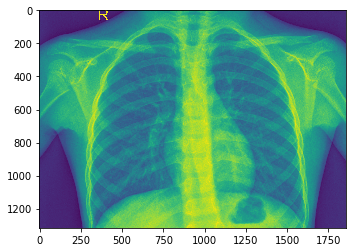

In [39]:
plt.imshow(t1)
plt.show()

In [0]:
import cv2


In [0]:
from tensorflow.keras.preprocessing import image


In [0]:
path='/content/ChestData/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg'

In [68]:
img = image.load_img(path,grayscale=True,target_size=(500,800))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


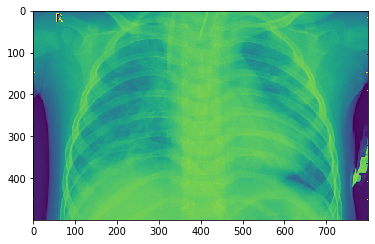

In [69]:
plt.imshow(img)
plt.show()


In [0]:
ima = image.img_to_array(img)

In [0]:
x = np.expand_dims(ima,axis=0)

In [0]:
images = np.vstack([x])

In [81]:
model.predict_classes(images)

array([[1]], dtype=int32)

# Predicting on test images

In [74]:
test_images_normal = '/content/ChestData/chest_xray/test/NORMAL'

test_image_pnemonia = '/content/ChestData/chest_xray/test/PNEUMONIA'

print('Total number of normal test images',len(os.listdir(test_images_normal)))

print('Total number of pnemonia test images',len(os.listdir(test_image_pnemonia)))




Total number of normal test images 234
Total number of pnemonia test images 390


In [0]:
test_images_normal_names = os.listdir(test_images_normal)

test_images_pnemonia_names = os.listdir(test_image_pnemonia)

In [0]:
normal_images_path = [os.path.join(test_images_normal,fname) for fname in test_images_normal_names]

In [0]:
pnemonia_images_path = [os.path.join(test_image_pnemonia,fname) for fname in test_images_pnemonia_names]

In [101]:
normal_predicted = []
for i in normal_images_path:
  img = image.load_img(i,grayscale=True,target_size=(500,800))
  img1 = image.img_to_array(img)
  x = np.expand_dims(img1,axis=0)
  y = model.predict_classes(x)
  #print('predicted=',y)
  normal_predicted.append(y)





/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


predicted= [[0]]
predicted= [[1]]
predicted= [[0]]
predicted= [[0]]
predicted= [[1]]
predicted= [[0]]
predicted= [[1]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0]]
predicted= [[1]]
predicted= [[0]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0]]
predicted= [[0]]
predicted= [[1]]
predicted= [[0]]
predicted= [[0]]
predicted= [[1]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0]]
predicted= [[0]]
predicted= [[0]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[1]]
predicted= [[0

In [0]:
#normal_predicted[0:100]

In [102]:
len(normal_predicted)

234

In [106]:
import seaborn as sns

y1 = np.array(normal_predicted)
y1.shape

(234, 1, 1)

In [110]:
y2 = np.squeeze(y1)
print(y2.shape)

(234,)


In [111]:
y2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

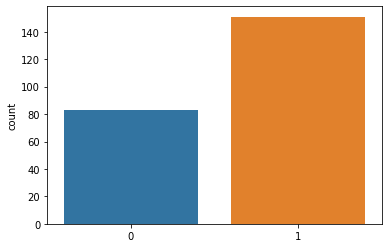

In [112]:
sns.countplot(y2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


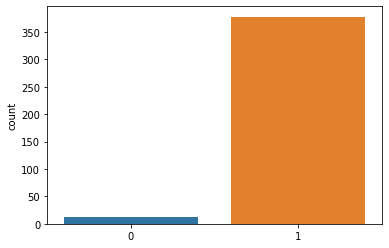

In [113]:
pnemonia_predicted = []
for i in pnemonia_images_path:
  img = image.load_img(i,grayscale=True,target_size=(500,800))
  img1 = image.img_to_array(img)
  x = np.expand_dims(img1,axis=0)
  y = model.predict_classes(x)
  #print('predicted=',y)
  pnemonia_predicted.append(y)

y3 = np.squeeze(pnemonia_predicted)
sns.countplot(y3)

In [0]:
model.save_weights('/content/weights.h5')